# Case Study

## Task1 Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Get raw Data
df = pd.read_csv("data/house_data_training.csv", sep=';') 
#Deleting row index
df = df.iloc[:, 1:]

### Visualisation 

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
count,1.500000e+04,1.500000e+04,15000.000000,15000.00000,15000.000000,1.500000e+04,15000.000000,14997.000000,14997.000000,14997.000000,...,14997.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,4.562654e+09,3.328097e+06,3.372400,2.12635,2096.708267,1.469860e+04,1.509533,0.006801,937.559056,0.227646,...,1972.397546,77.436533,98076.245733,47.554242,-122.213894,1991.374400,12566.263467,48.617462,104.143663,152.761125
std,2.867844e+09,1.643430e+07,0.902832,0.76925,984.417205,3.842964e+04,0.545462,0.082192,268.828882,0.755120,...,29.545072,385.447294,53.580436,0.140877,0.139778,692.536001,26827.490013,22.174254,13.005133,25.724786
min,1.000102e+06,1.000000e+04,0.000000,0.00000,370.000000,5.200000e+02,1.000000,0.000000,93.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.515000,399.000000,651.000000,10.010585,55.397985,75.072384
25%,2.124064e+09,3.180000e+05,3.000000,1.75000,1430.000000,5.000000e+03,1.000000,0.000000,757.720000,0.000000,...,1953.000000,0.000000,98031.000000,47.458500,-122.326000,1480.000000,5040.000000,29.262797,95.316786,132.916027
50%,3.888100e+09,4.517775e+05,3.000000,2.25000,1920.000000,7.566000e+03,1.500000,0.000000,936.580000,0.000000,...,1977.000000,0.000000,98065.000000,47.566950,-122.234000,1840.000000,7601.000000,48.557508,104.253927,152.870930
75%,7.300410e+09,6.600000e+05,4.000000,2.50000,2570.000000,1.068575e+04,2.000000,0.000000,1116.120000,0.000000,...,1999.000000,0.000000,98117.000000,47.675325,-122.126000,2380.000000,10050.000000,67.847538,112.975883,172.439485
max,9.895000e+09,1.000000e+08,11.000000,8.00000,17180.000000,1.164794e+06,3.500000,1.000000,1919.340000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6210.000000,871200.000000,86.999842,157.639420,229.276426


In [ ]:
#JOKE: Aber vllt. was ähnliches zur ersten visualisierung
sns.pairplot(df, 
    x_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    y_vars=['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15'],
    corner=True)

### Korrelation
#### Visualisierung
Spearman Korrelation aufgrund der fehlenden normalverteilung. Wert um 0 bedeuten eine geringe Kerrelation. Werte richtung 1 oder -1 zeigen eine starke Korrelation (positiv & negativ)

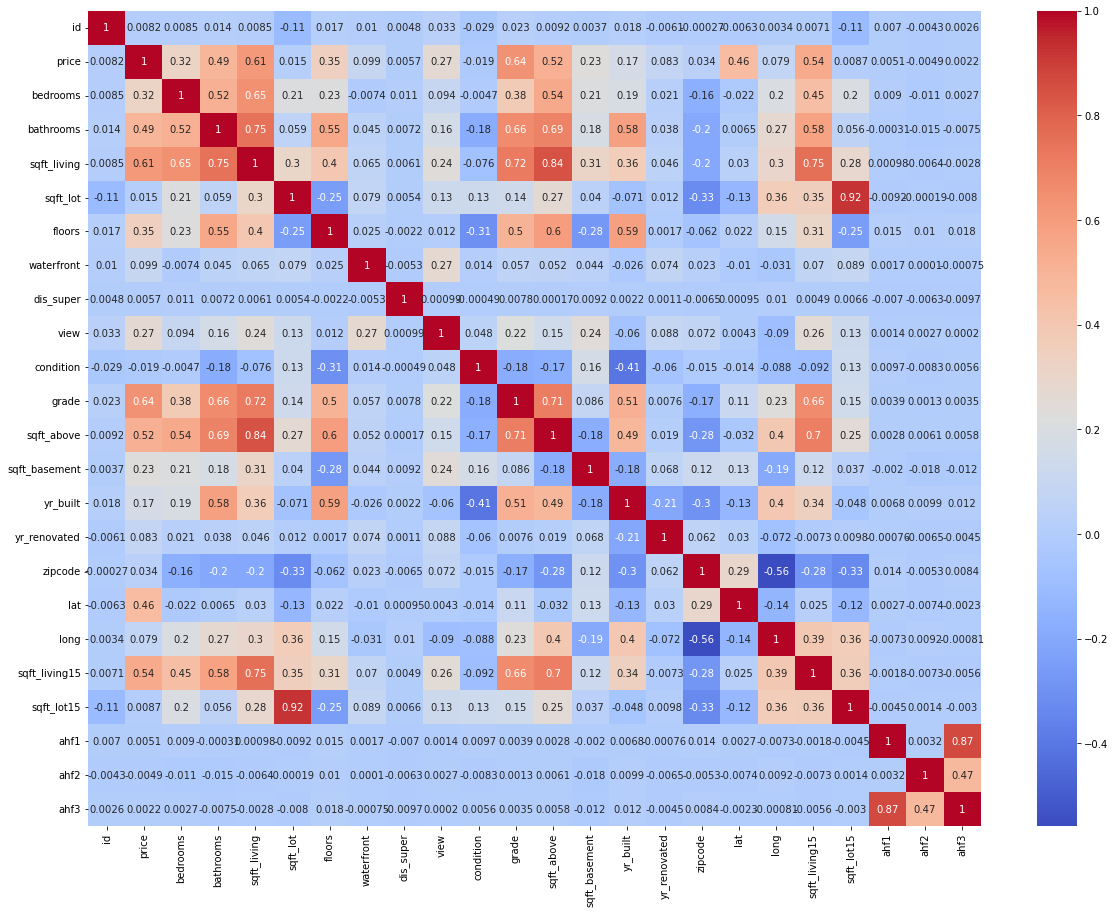

In [10]:
#data 
corr =df.corr(method="spearman")
#Größe der Heatmap
fig, ax = plt.subplots(figsize=(20,15))
#Colorpalette
cmap = sns.color_palette("coolwarm", as_cmap=True)
#Heatmap
sns.heatmap(ax=ax,data=corr,cmap=cmap, annot=True)
plt.show()

#### In Zahlen

Korrelation Zwischen den Features und dem Preis

In [20]:
rel_features =[]
corr_fig = corr["price"]
ix = corr.sort_values('price', ascending=False).index
print("Relevante Korrelationen:")
for i in ix:
    if corr_fig[i]>= 0.3 or corr_fig[i]<=-0.3:
        rel_features.append(i)
        print("Die Korrelation von", i,"zum Preis:", corr_fig[i])

Relevante Korrelationen:
Die Korrelation von price zum Preis: 1.0
Die Korrelation von grade zum Preis: 0.6401067473706725
Die Korrelation von sqft_living zum Preis: 0.6062749275007229
Die Korrelation von sqft_living15 zum Preis: 0.5421231339869004
Die Korrelation von sqft_above zum Preis: 0.5159252796909916
Die Korrelation von bathrooms zum Preis: 0.4929443152367283
Die Korrelation von lat zum Preis: 0.4585259627037452
Die Korrelation von floors zum Preis: 0.3462941803523132
Die Korrelation von bedrooms zum Preis: 0.3176570486167373


In [24]:
#rel_features.remove("price")
corr.loc[rel_features,rel_features]

,grade,sqft_living,sqft_living15,sqft_above,bathrooms,lat,floors,bedrooms
grade,1.000000,0.715904,0.662296,0.712569,0.660260,0.106526,0.503766,0.377440
sqft_living,0.715904,1.000000,0.752361,0.844711,0.745312,0.029569,0.399828,0.645106
sqft_living15,0.662296,0.752361,1.000000,0.703363,0.575114,0.024596,0.305351,0.447155
sqft_above,0.712569,0.844711,0.703363,1.000000,0.694059,-0.032401,0.597743,0.544572
bathrooms,0.660260,0.745312,0.575114,0.694059,1.000000,0.006530,0.551926,0.518573
lat,0.106526,0.029569,0.024596,-0.032401,0.006530,1.000000,0.021628,-0.021503
floors,0.503766,0.399828,0.305351,0.597743,0.551926,0.021628,1.000000,0.226751
bedrooms,0.377440,0.645106,0.447155,0.544572,0.518573,-0.021503,0.226751,1.000000


#### Schlussfolgerungen
Mit dem Preis korrelieren insbesondere die Features 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'floors' und 'bedrooms' Diese sollten bei der Feature Selection aufjedenfall berücksichtigt werden.

### Missing Values
##### NaN 

In [ ]:
df.info()

In [9]:
print("Die Anzahl der Zeilen, in denen MV vorhanden und gekennzeichnet sind beträgt",len(df[df.isnull().any(axis=1)]),":")
df[df.isnull().any(axis=1)]

Die Anzahl der Zeilen, in denen MV vorhanden und gekennzeichnet sind beträgt 3 :


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
7163,2624049185,20140909T000000,405000.0,3,1.75,1760,5355,1.0,NaN,NaN,...,NaN,0,98118,47.5368,-122.267,1790,6225,13.843391,109.343999,123.187390
10957,9222400510,20150107T000000,406000.0,2,1.00,880,3000,1.0,NaN,NaN,...,NaN,0,98115,47.6749,-122.323,890,3000,50.170114,102.588214,152.758329
14780,7011201245,20141107T000000,655000.0,3,1.00,1270,3600,1.5,NaN,NaN,...,NaN,0,98119,47.6368,-122.370,1710,3600,56.035650,121.245433,177.281083


Es fehlen drei Werte in den Features "Waterfront", "dis_super", "view", "condition", "grade", "sqft_above", "sqft_basement" und "yr_build". Da diese aber alle in den selben drei Zeilen Fehlen kann man auch aufgrund der Größe des Datensatzes diese drei Zeilen löschen.

In [4]:
#Löschen aller Zeilen mit MV
df=df.dropna()

### Weitere Auffälligkeiten

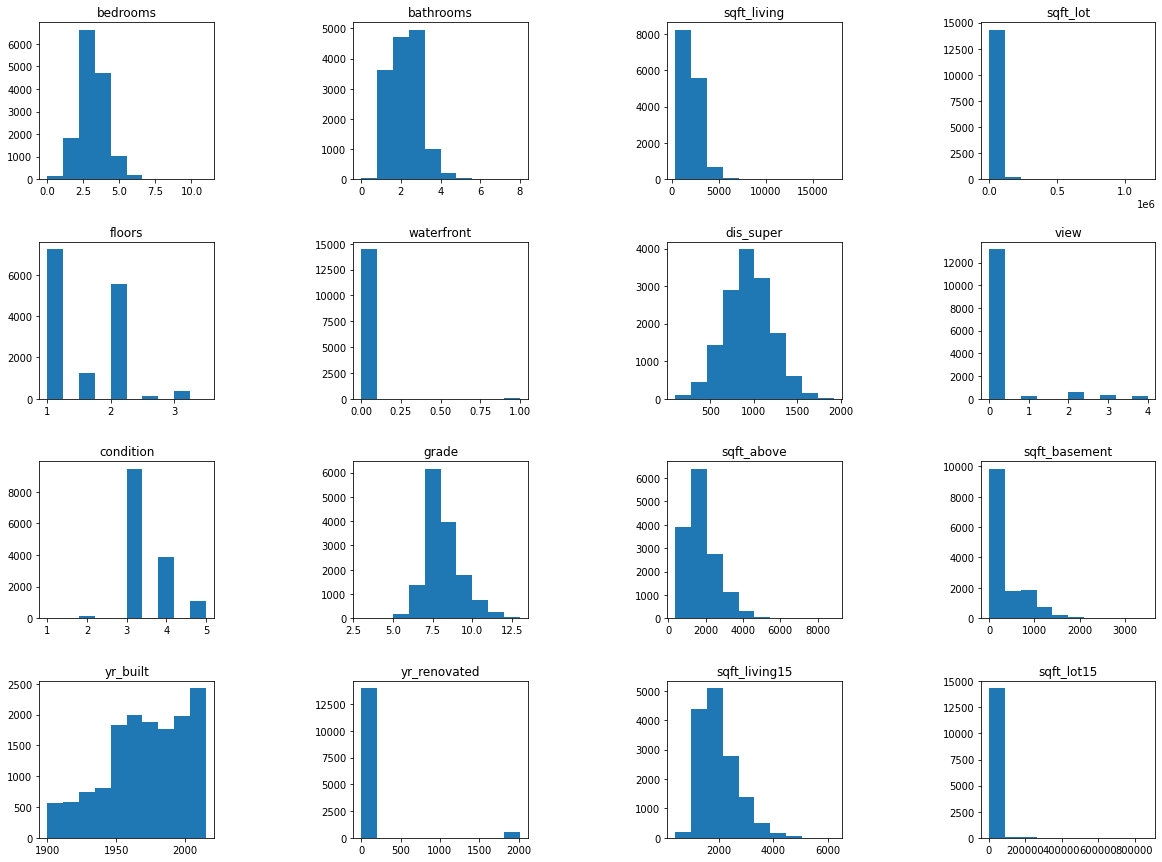

In [93]:
#Hab mir mal deinen Code geklaut -Tim
re_col=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].hist(df[i])
    ax[x].set_title(i)
    x+=1

In [72]:
for i in df.columns:
    all = len(df)
    modus = len(df.loc[df[i] == df[i].mode()[0]])
    percentage = round(modus / all, 4) * 100
    if percentage > 5 and df[i].mode()[0] == 0:
        print(f"{i}:  \n    Der Wert 0 macht {percentage}% aller Werte aus")

waterfront:  
    Der Wert 0 macht 99.31% aller Werte aus
view:  
    Der Wert 0 macht 90.34% aller Werte aus
sqft_basement:  
    Der Wert 0 macht 61.25000000000001% aller Werte aus
yr_renovated:  
    Der Wert 0 macht 96.0% aller Werte aus


Die vier Featurs **waterfront**, **view**, **sqft_basement** und **yr_renovated** enthalten auffällig oft den Wert 0.
  
- Bei **view** könnte der Wert teil der Skala sein.  
- Im Fall von **sqft_basement** würde 0 vermutlich keinen Keller bedeuten.  
- Für **yr_renovated** stellt die 0 einen unrealistischen Wert dar. Sie könnte dennoch eine Information enthalten.  
- **waterfront** hat nur die Werte 0 und 1. Diese Werte wohl für Wahrheitswerte, sprich ob ein Haus eine Wasserfront hat oder nicht. Das würde die 99.31% 0 erklären.  
  
Auch bei **sqft_lot** und **sqft_lot 15** gibt es unnatürlich viele Werte bei 0. Das scheint aber an Ausreißern (siehe weiter unter) und der kleinen Darstellung zu liegen.
  
*Anmerkung: der folgende Teil wurde erst nach der Entfernung der Ausreißer beim Preis ausgeführt*  

##### **view:**
Obwohl die Wertung 0 im Feature **view** unüblich oft auftaucht, scheint sie nicht weiter ungewöhnlich zu sein.  
Der durchschnittliche Preis steigt einigermaßen gleichmäßig von 0 bis 5 an, wie der Barplot weiter unten aufzeigt

<AxesSubplot:xlabel='view', ylabel='price'>

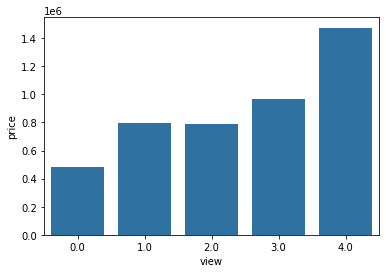

In [74]:
view_df = df.loc[:, ["view", "price"]].groupby("view").mean()
sns.barplot(x=view_df.index, y=view_df.price, color="#1c74b4")

##### **waterfront:**
Die Gebäude mit **waterfront** = 1 sind deutlich mehr Wert. Die 0 steht anscheinend wirklich für keine Wasserfront.

In [91]:
print("Werte in df.waterfront:",df.waterfront.unique())

waterfront_0 = round(df.loc[df.waterfront == 0].price.mean(), 2)
waterfont_1 = round(df.loc[df.waterfront != 0].price.mean(), 2)
difference = round((waterfont_1 / waterfront_0 - 1) * 100, 2) 

print(f"Der durchschnittliche Preis bei waterfront = 0: {waterfront_0}\nDer durchschnittliche Preis bei waterfront = 1: {waterfont_1}\nDas sind etwa {difference}% mehr.")

Werte in df.waterfront: [0. 1.]
Der durchschnittliche Preis bei waterfront = 0: 521284.7
Der durchschnittliche Preis bei waterfront = 1: 1684387.05
Das sind etwa 223.12% mehr.


##### **sqft_basement:**

Der Wert 0 bei **sqft_basement** senkt den Durchschnittspreis etwas im Vergleich zu anderen Werten.  
Insgesamt scheint er aber nicht aus dem Rahmen zu fallen.

<AxesSubplot:>

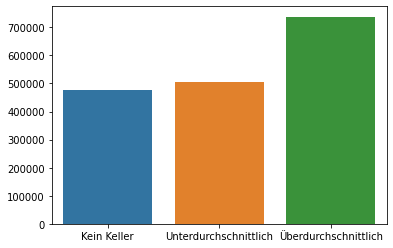

In [110]:
sqft_basement_0 = round(df.loc[df.sqft_basement == 0].price.mean(), 2)
mean = df.loc[df.sqft_basement != 0].sqft_basement.mean()
sqft_basement_below_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement < mean)].price.mean(), 2)
sqft_basement_above_mean = round(df.loc[np.logical_and(df.sqft_basement != 0, df.sqft_basement > mean)].price.mean(), 2)

sns.barplot(x=["Kein Keller","Unterdurchschnittlich", "Überdurchschnittlich"], y=[sqft_basement_0,sqft_basement_below_mean,sqft_basement_above_mean])

##### **yr_renovated:**
Wie durch den Codeblock dargestellt, ist der durchschnittliche Preis von Gebäuden mit Renovierungsdatum deutlich höher.  
Eine mögliche Erklärung wäre, dass die 0 bei **yr_renovated** bedeutet, dass das Gebäude noch nicht renoviert wurde.  
Sicher ist dabei, dass der Wert 0 eine Auswirkung auf den Preis hat. Daher muss diese Information erhalten bleiben.

In [89]:
no_renovated_mean = round(df.loc[df.yr_renovated == 0].price.mean(), 2)
renovated_mean = round(df.loc[df.yr_renovated != 0].price.mean(), 2)
difference = round((renovated_mean / no_renovated_mean - 1) * 100, 2) 

print(f"Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: {no_renovated_mean}\nDer durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: {renovated_mean}\nDas sind etwa {difference}% mehr.")

Der durchschnittliche Preis von Gebäuden ohne Renovierungsdatum ist: 520105.54
Der durchschnittliche Preis von Gebäuden mit Renovierungsdatum ist: 751459.07
Das sind etwa 44.48% mehr.


### Outliers

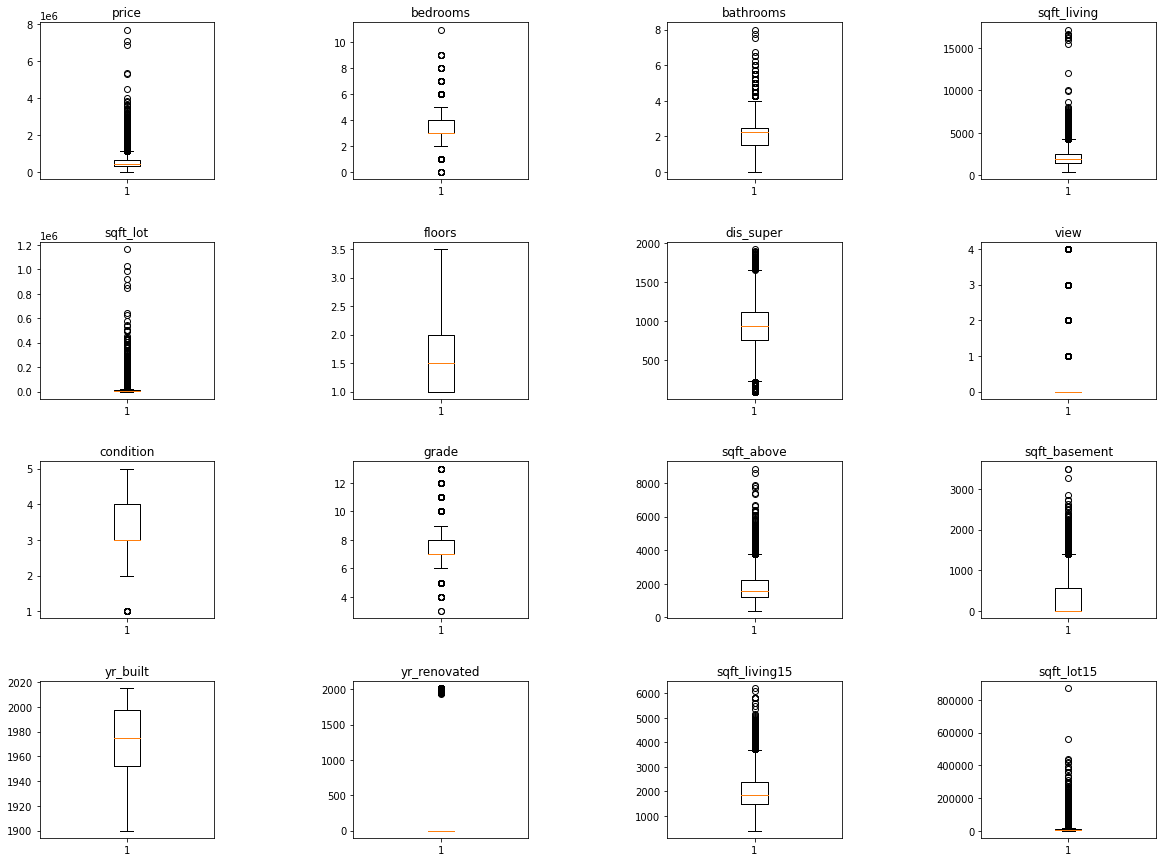

In [69]:
#Visuallisierung von Ausreißern
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(4,4, figsize=(20,15))
fig.subplots_adjust(hspace = .4, wspace=0.8)
ax=ax.ravel()

x=0
for i in re_col:
    ax[x].boxplot(df[i])
    ax[x].set_title(i)
    x+=1

#Ausreißer behandlung natürlich erst nach der Normalisierung aber für den ersten überblick. 
#Anmerkung von Tim: Warum erst nach der Normalisierung? Normalisierung kann nicht mit Ausreßern umgehen. 

Ausreißer beim Preis und bei den verschiedenen Flächen (sqft_...)  
  
Außerdem auffällig:  
**yr_renovated**, **view** und **sqft_basement** enthalten sehr oft den Wert 0



In [60]:
#Visuallisierung von Ausreißern
re_col=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'dis_super', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15']

x=0
for i in re_col:
    df_temp = df[i]
    mean = df_temp.mean()
    std = df_temp.std()

    std_3 = len(df.loc[np.logical_or(df[i] > mean + 3 * std, df[i] < mean - 3 * std)])

    print(f"{i}:\n{std_3} outside threshold of three standard deviations")
    

#Ausreißer behandlung natürlich erst nach der Normalisierung aber für den ersten überblick. 
#Anmerkung von Tim: Warum erst nach der Normalisierung? Normalisierung kann nicht mit Ausreßern umgehen. 

price:
260 outside threshold of three standard deviations
bedrooms:
50 outside threshold of three standard deviations
bathrooms:
116 outside threshold of three standard deviations
sqft_living:
144 outside threshold of three standard deviations
sqft_lot:
232 outside threshold of three standard deviations
floors:
6 outside threshold of three standard deviations
dis_super:
40 outside threshold of three standard deviations
view:
553 outside threshold of three standard deviations
condition:
23 outside threshold of three standard deviations
grade:
84 outside threshold of three standard deviations
sqft_above:
168 outside threshold of three standard deviations
sqft_basement:
163 outside threshold of three standard deviations
yr_built:
0 outside threshold of three standard deviations
yr_renovated:
582 outside threshold of three standard deviations
sqft_living15:
163 outside threshold of three standard deviations
sqft_lot15:
234 outside threshold of three standard deviations


##### **price :**

In [22]:
print("Die Größten zehn Werte des Features price:")
print(np.sort(df.price.unique())[-10:])

print("Anzahl Ausreißer mit 99 Millionen: " + str(len(df.loc[df.price == 99999999.0])))
print("Anzahl Ausreißer mit 9 Millionen: " + str(len(df.loc[df.price == 9999999.9])))

df = df.loc[df.price != 99999999.0].loc[df.price != 9999999.9]

Die Größten zehn Werte des Features price:
[3650000. 3800000. 3850000. 4000000. 4500000. 5300000. 5350000. 6885000.
 7062500. 7700000.]
Anzahl Ausreißer mit 99 Millionen: 0
Anzahl Ausreißer mit 9 Millionen: 0


Die höchsten beiden Werte im Feature **price** scheinen keine Validen Preise für Gebäude zu sein.  
9,99 Millionen wären zwar ein denkbares Preis für ein Luxuriöses Gebäude, da der Preis jedoch nur aus Neunen besteht, ist zumindest das Muster auffällig.  
Außerdem fällt auf, dass die beiden höchsten Werte die selben sind, bis auf das Komma, das um eine Stelle verschoben ist.  
Es scheint sich um einen falschen Wert, oder einen falsch gekennzeichneten fehlenden Wert zu handeln.  

### Noise

### Transformed, standardized or normalized

In [25]:
#Transform Data 

#Example --> string to datetime
df["date"] = pd.to_datetime(df["date"])
print(df["grade"])
df.tail()

0         8.0
1        10.0
2         7.0
3         8.0
4         8.0
         ... 
14995     7.0
14996     9.0
14997     8.0
14998     8.0
14999     8.0
Name: grade, Length: 15000, dtype: float64


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,dis_super,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ahf1,ahf2,ahf3
14995,5700000905,2014-08-16,739000.0,5,2.5,2840,5000,1.0,0.0,694.64,...,1913.0,0,98144,47.5817,-122.291,2200,5000,24.130536,112.985690,137.116226
14996,2623069106,2015-02-19,710000.0,6,3.5,3830,68825,2.0,0.0,1156.61,...,1995.0,0,98027,47.4574,-122.003,2410,68825,83.830652,90.383630,174.214282
14997,1530900290,2014-10-07,475000.0,3,2.5,2280,3710,1.0,0.0,1352.78,...,1990.0,0,98072,47.7350,-122.159,2030,3710,13.268193,117.766765,131.034957
14998,4310701600,2014-11-13,340000.0,3,2.5,1240,1115,3.0,0.0,1245.41,...,2003.0,0,98103,47.6985,-122.340,1410,1355,48.352194,102.297062,150.649256
14999,8079010230,2014-06-03,475000.0,3,2.5,2600,7210,2.0,0.0,874.81,...,1989.0,0,98059,47.5123,-122.151,2350,7225,12.626021,95.332639,107.958660


### Renovation Transformation
Da die meisten Gebäude nicht renoviert wurden haben wir uns dazu entschieden zwei neue Spalten dem Datensatz hinzuzügen.
- "renovated_yn" als Binäre Spalte die aussagt ob ein Haus Renoviert wurde
- "last_renovated" damit mögliche Informationen über neuere oder älter Renovierungen nicht verloren gehen wird die Jahresunterschied von der Renovierung bis zum Verkaufsjahr festgehalten. Bei gebäuden die nicht Roniviert wurden wird der Abstand vom Erbauungsjahr bis zum Verkaufsjahr genommen.

In [35]:
renovated_yn= []
last_renovated=[]
#2015 mit jahr aus "date" ersetzen
for i in df.index:
    if df["yr_renovated"][i] != 0:
        renovated_yn.append(1)
        last_renovated.append(2015-df["yr_renovated"][i])
    else:
        renovated_yn.append(0)
        last_renovated.append(2015-df["yr_built"][i])

df["renovated_yn"] = renovated_yn
df["last_renovated"] = last_renovated
df.iloc[:,-2:]

,renovated_yn,last_renovated
0,0,22.0
1,0,30.0
2,0,66.0
3,0,110.0
4,0,45.0
...,...,...
14995,0,102.0
14996,0,20.0
14997,0,25.0
14998,0,12.0
